# Figuras Estructura

#### Cargamos las librerías y los datos

In [1]:
library(zoo)
library(ggplot2)

sales <- read.csv('./monthly-car-sales-in-quebec-1960.csv')
names(sales)[2] <- 'Car.Sales'

Warning message:
"package 'zoo' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

#### Figura 5

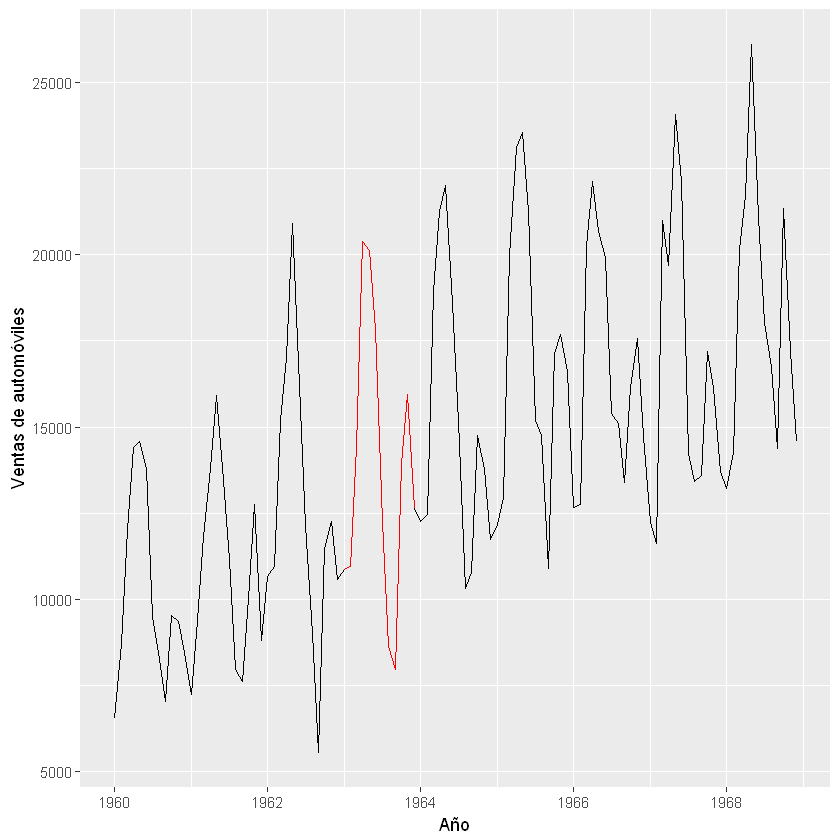

In [2]:
zoo.sales <- zoo(sales$Car.Sales,
                 order.by = seq.Date(from = as.Date('1960-01-01'), to = as.Date('1968-12-01'), by = 'month'))

zoo.sales.sub <- window(zoo.sales,
                        index = seq.Date(from = as.Date('1963-01-01'), to = as.Date('1963-12-01'), by = 'month'))
entera <- ggplot() +
  geom_line(aes(x = index(zoo.sales), y = coredata(zoo.sales))) +
  geom_line(aes(x = index(zoo.sales.sub), y = coredata(zoo.sales.sub)), color = 'red') +
  xlab('Año') + ylab('Ventas de automóviles')
entera

#### Figura 6

Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.


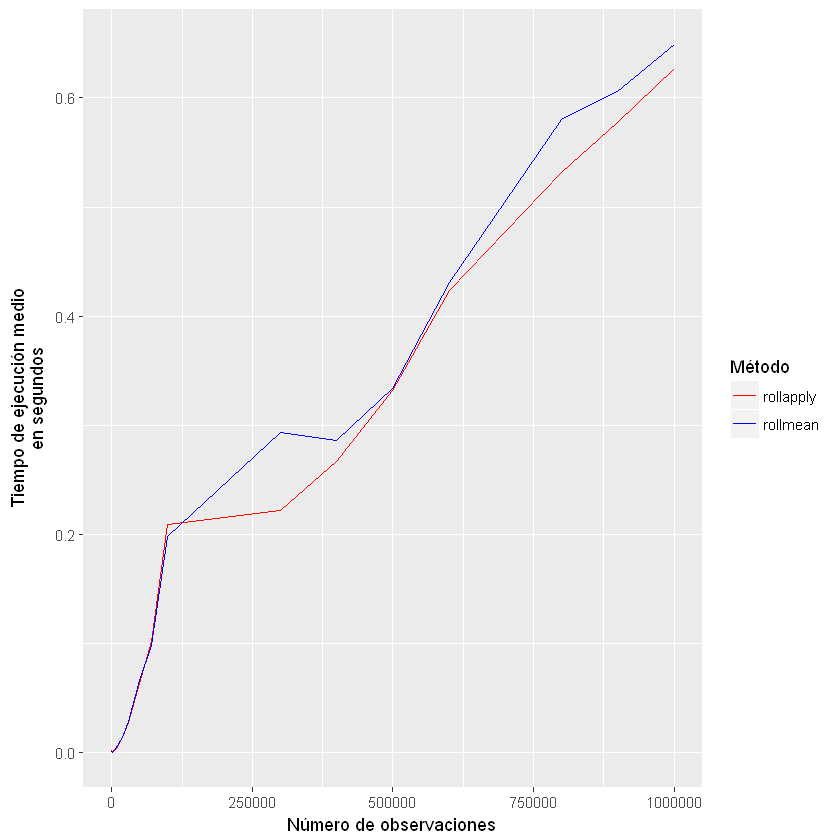

In [3]:
obs <- c(100, 500, 1000, 5000, 10000, 20000, 30000, 50000, 70000, 100000, 300000, 400000, 500000,
         600000, 800000, 900000, 1000000)

df.apply <- data.frame(del = rep(1, length(obs)))
df.mean <- data.frame(del = rep(1, length(obs)))

for (t in 1:100) {
  timing_mean <- c()
  timing_apply <- c()
  
  for (i in obs) {
    data.sample <- zoo(rnorm(i, 200, 20))
    timing_mean <- c(timing_mean,
                     as.numeric(system.time(rollmean(x = data.sample, k = 12, align = 'right'))[3]))
    timing_apply <- c(timing_apply,
                      as.numeric(system.time(rollapply(data = data.sample, width = 12,
                                                       FUN = mean, align = 'right'))[3]))
  }
  df.apply <- cbind.data.frame(df.apply, timing_apply)
  df.mean <- cbind.data.frame(df.mean, timing_mean)
}

df.mean <- df.mean[, -1]
df.apply <- df.apply[, -1]

timing_apply <- apply(df.apply, 1, mean)
timing_mean <- apply(df.mean, 1, mean)

timing.plot <- ggplot() +
  geom_line(aes(x = obs, y = timing_apply, colour = 'timing_apply')) +
  geom_line(aes(x = obs, y = timing_mean, colour = 'timing_mean')) +
  xlab('Número de observaciones') + ylab('Tiempo de ejecución medio\nen segundos') +
  scale_color_manual(name = 'Método', values = c('timing_apply' = 'red', 'timing_mean' = 'blue')) +
  scale_color_manual(name = 'Método', values = c('timing_apply' = 'red', 'timing_mean' = 'blue'),
                     labels = c('rollapply','rollmean'))
timing.plot